In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data

In [2]:
columns=['Engine.ID', 'cycle', 'setting1', 'setting2', 'setting3'] + ['iot{}'.format(x) for x in range(29)]

train, test = (pd.read_csv('data/{}_FD001.txt'.format(x), sep=' ', header=None, names=columns) for x in ['train', 'test'])
rul = pd.read_csv('data/RUL_FD001.txt', header=None, names=['rul'])

In [3]:
train.head()

,Engine.ID,cycle,setting1,setting2,setting3,iot0,iot1,iot2,iot3,iot4,...,iot19,iot20,iot21,iot22,iot23,iot24,iot25,iot26,iot27,iot28
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,39.06,23.4190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,39.00,23.4236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,38.95,23.3442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,38.88,23.3739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,38.90,23.4044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test.head()

,Engine.ID,cycle,setting1,setting2,setting3,iot0,iot1,iot2,iot3,iot4,...,iot19,iot20,iot21,iot22,iot23,iot24,iot25,iot26,iot27,iot28
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,38.86,23.3735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,39.02,23.3916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,39.08,23.4166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,39.00,23.3737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,38.99,23.4130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
rul.index.names = ['Engine.ID']
rul.head()

,rul
Engine.ID,
0,112
1,98
2,69
3,82
4,91


# EDA

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:
1.	unit number
2.	time, in cycles
3.	operational setting 1
4.	operational setting 2
5.	operational setting 3
6.	sensor measurement  1
7.	sensor measurement  2
...
26.	sensor measurement  26

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 34 columns):
Engine.ID    20631 non-null int64
cycle        20631 non-null int64
setting1     20631 non-null float64
setting2     20631 non-null float64
setting3     20631 non-null float64
iot0         20631 non-null float64
iot1         20631 non-null float64
iot2         20631 non-null float64
iot3         20631 non-null float64
iot4         20631 non-null float64
iot5         20631 non-null float64
iot6         20631 non-null float64
iot7         20631 non-null float64
iot8         20631 non-null float64
iot9         20631 non-null float64
iot10        20631 non-null float64
iot11        20631 non-null float64
iot12        20631 non-null float64
iot13        20631 non-null float64
iot14        20631 non-null float64
iot15        20631 non-null float64
iot16        20631 non-null int64
iot17        20631 non-null int64
iot18        20631 non-null float64
iot19        20631 non-null float64

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 34 columns):
Engine.ID    13096 non-null int64
cycle        13096 non-null int64
setting1     13096 non-null float64
setting2     13096 non-null float64
setting3     13096 non-null float64
iot0         13096 non-null float64
iot1         13096 non-null float64
iot2         13096 non-null float64
iot3         13096 non-null float64
iot4         13096 non-null float64
iot5         13096 non-null float64
iot6         13096 non-null float64
iot7         13096 non-null float64
iot8         13096 non-null float64
iot9         13096 non-null float64
iot10        13096 non-null float64
iot11        13096 non-null float64
iot12        13096 non-null float64
iot13        13096 non-null float64
iot14        13096 non-null float64
iot15        13096 non-null float64
iot16        13096 non-null int64
iot17        13096 non-null int64
iot18        13096 non-null float64
iot19        13096 non-null float64

## Drop columns with no data

In [8]:
train.drop(['iot{}'.format(x) for x in range(21, 29)], axis=1, inplace=True)
test.drop(['iot{}'.format(x) for x in range(21, 29)], axis=1, inplace=True)

## Check for duplicates

In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

## Summarize variables

In [11]:
train.describe()

,Engine.ID,cycle,setting1,setting2,setting3,iot0,iot1,iot2,iot3,iot4,...,iot11,iot12,iot13,iot14,iot15,iot16,iot17,iot18,iot19,iot20
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [12]:
test.describe()

,Engine.ID,cycle,setting1,setting2,setting3,iot0,iot1,iot2,iot3,iot4,...,iot11,iot12,iot13,iot14,iot15,iot16,iot17,iot18,iot19,iot20
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,13096.00,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,518.67,642.475088,1588.099204,1404.735362,1.462000e+01,...,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.0,0.00,0.400899,5.003274,6.688309,1.776425e-15,...,0.559627,0.056934,10.188605,0.029009,1.040874e-17,1.233577,0.0,0.0,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,100.0,518.67,641.130000,1569.040000,1384.390000,1.462000e+01,...,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,518.67,642.197500,1584.600000,1399.950000,1.462000e+01,...,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600
50%,52.000000,69.000000,0.000000,0.000000,100.0,518.67,642.460000,1587.990000,1404.440000,1.462000e+01,...,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,100.0,518.67,642.740000,1591.362500,1409.050000,1.462000e+01,...,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,100.0,518.67,644.300000,1607.550000,1433.360000,1.462000e+01,...,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900


## Plot the data

In [13]:
def plot_settings(df):
    '''
    Plot engine settings
    '''
    plt.figure(figsize = (14, 6))
    d = df.set_index('cycle')
    for s in range(1,4):
        plt.subplot(1, 3, s)
        plt.title('setting{}'.format(s))
        for engine in range(1, 101):
            dd = d[d["Engine.ID"] == engine]
            dd['setting{}'.format(s)].plot()
            
    plt.tight_layout()
    plt.show()

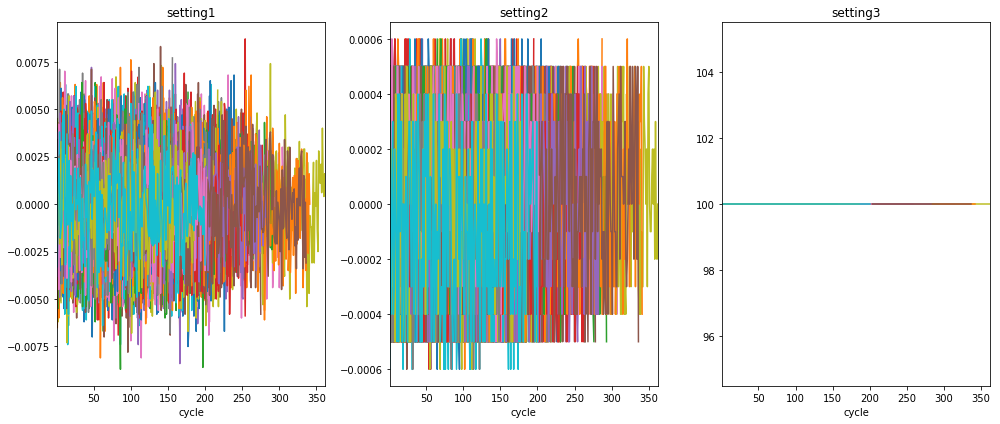

In [14]:
plot_settings(train)

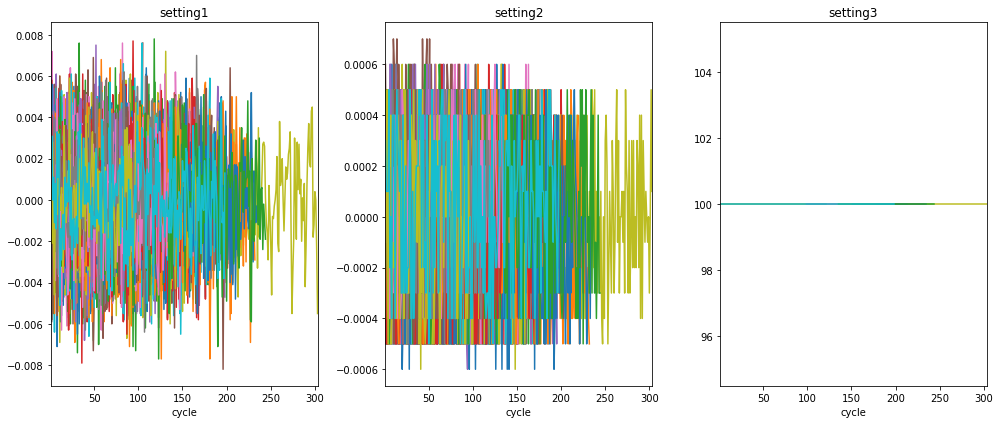

In [15]:
plot_settings(test)

Parameter setting3 doesn't provide any additional information besides number of cycles before engine failure. This information is included in setting1 and setting2 therefore we will drop setting3.

In [16]:
train.drop(['setting3'], axis=1, inplace=True)
test.drop(['setting3'], axis=1, inplace=True)

In [17]:
def plot_iot(df):
    '''
    Plot engine iots
    '''
    plt.figure(figsize = (14, 21))
    d = df.set_index('cycle')
    for s in range(21):
        plt.subplot(7, 3, s + 1)
        plt.title('iot{}'.format(s))
        for engine in range(1, 101):
            dd = d[d["Engine.ID"] == engine]
            dd['iot{}'.format(s)].plot()
    plt.tight_layout()
    plt.show()

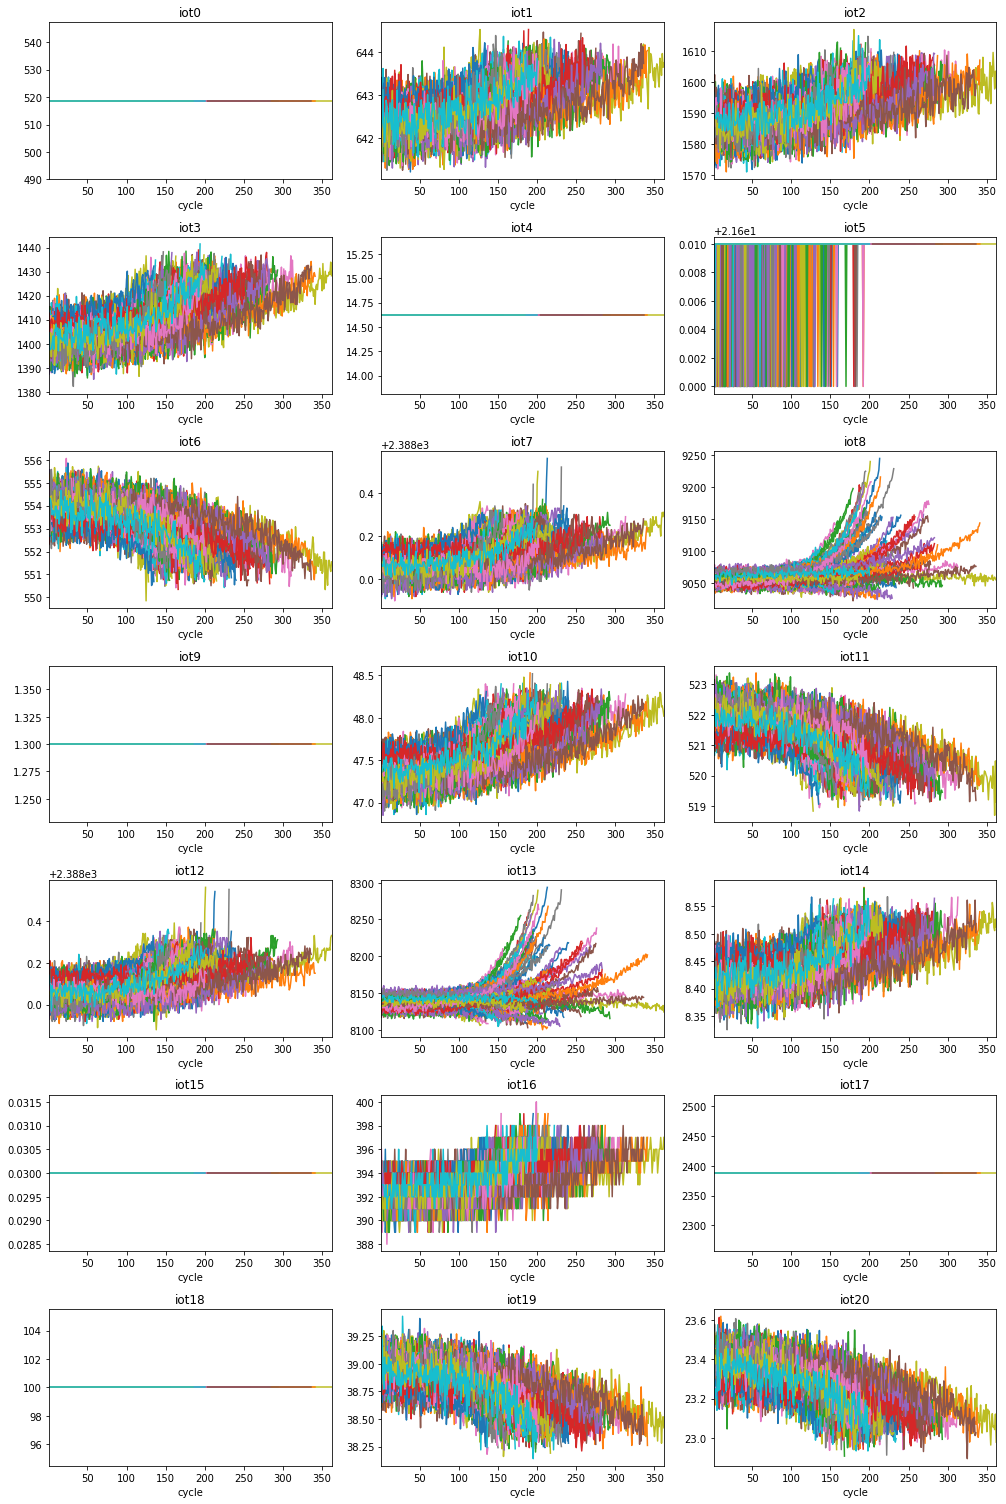

In [18]:
plot_iot(train)

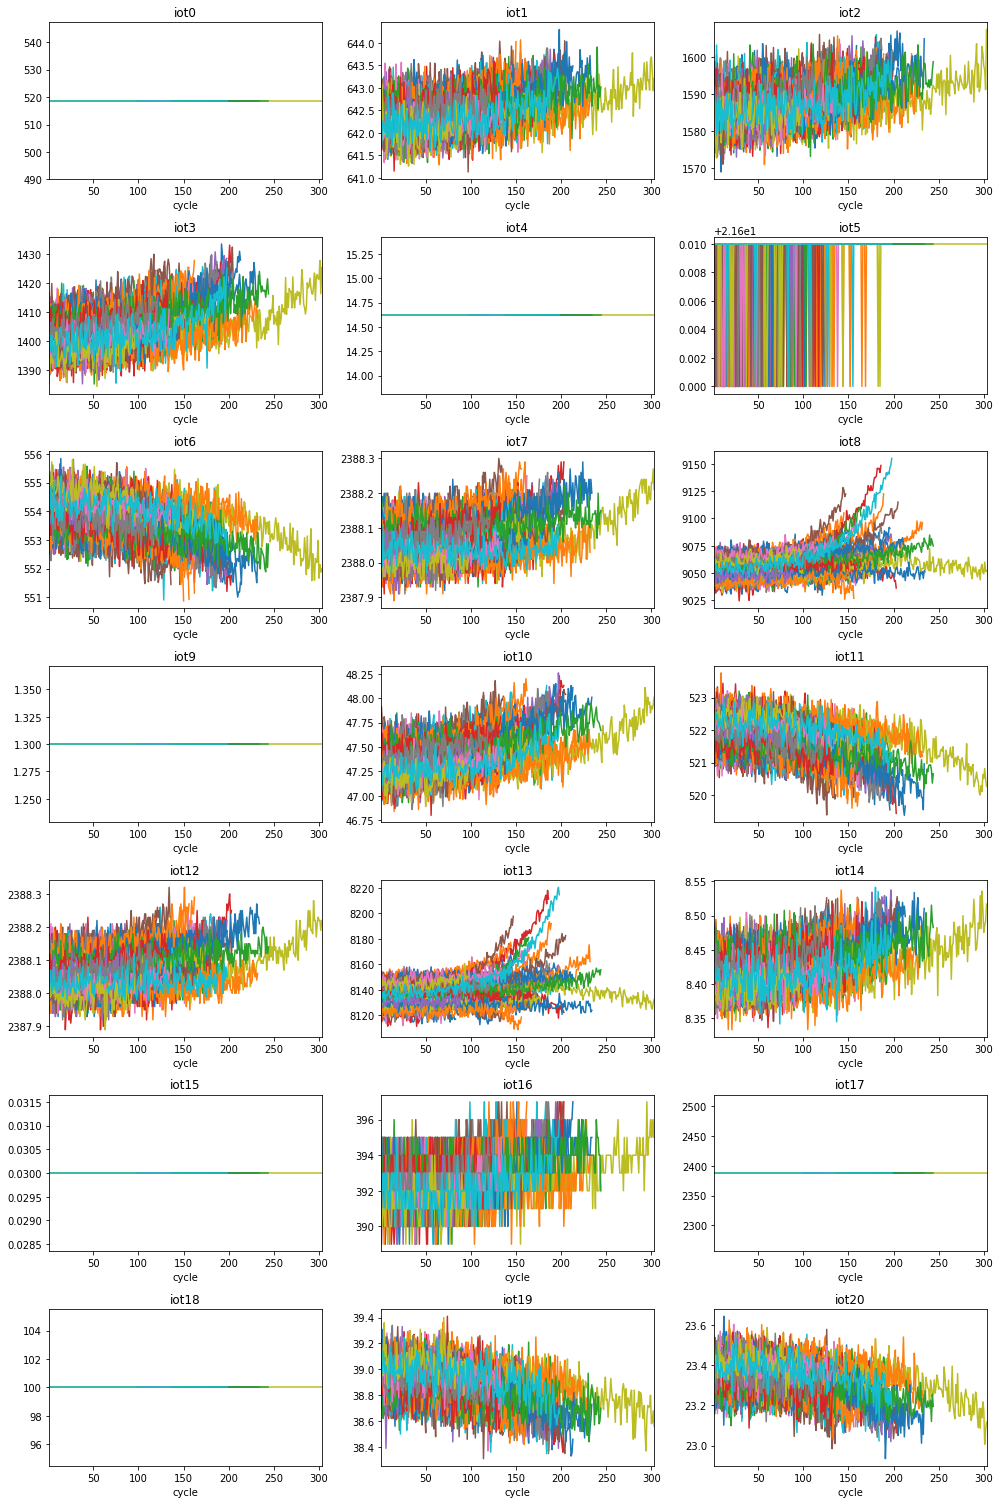

In [19]:
plot_iot(test)

Since there is no signal on couple of sensors we will remove these from the dataset.

In [20]:
train.drop(['iot0', 'iot4', 'iot5', 'iot9', 'iot15', 'iot17', 'iot18'], axis=1, inplace=True)
test.drop(['iot0', 'iot4', 'iot5', 'iot9', 'iot15', 'iot17', 'iot18'], axis=1, inplace=True)

# Survival model

If we only have failure data we can use survival model. Based on probability distribution of the RUL data we can estimate the remianing useful life.

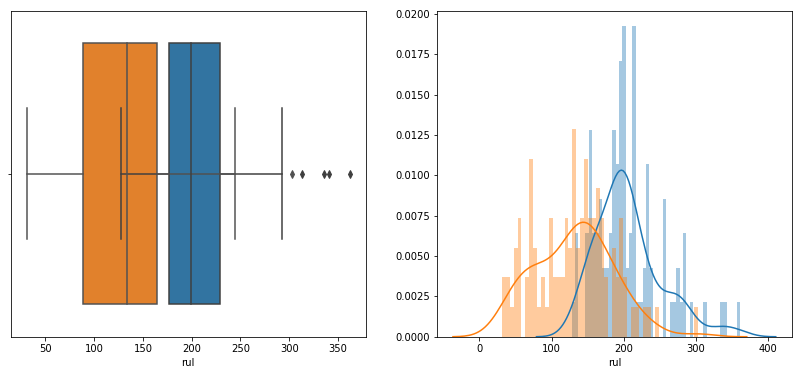

In [21]:
def create_rul(df):
    rul = pd.DataFrame(columns=['Engine.ID', 'rul'])
    for engine in range(1, 101):
        r = df[df['Engine.ID'] == engine].cycle.max()
        rul = rul.append({"Engine.ID": engine, "rul": r.astype(float)}, ignore_index=True)
    rul.set_index('Engine.ID', inplace=True)
    return rul

rul_train = create_rul(train)
rul_test = create_rul(test)

plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(rul_train.rul, color='C0')
sns.boxplot(rul_test.rul, color='C1')
plt.subplot(1,2,2)
sns.distplot(rul_train.rul, bins=50, color='C0')
sns.distplot(rul_test.rul, bins=50, color='C1')
plt.show()

# Degradation model

If failure data is ot available but we have knowledge of safety threshold we can user degradation model. Safety threshold that shouldn't be crossed as that will result in failure. What we need is to fit a degradation model to the condition indicator, which uses past information from the engine to predict how the condition indicator will change in the future. This way we can estimate how many cycles are left until the condition indicator crosses the threshold, which helps us estimate the RUL.

## Create new variable target indicating engine status

In [22]:
def create_engine_status(df):
    def status(rul):
        if rul < 15:
            return 'critical'
        elif rul < 30:
            return 'warning'
        else:
            return 'normal'
    
    rul = pd.DataFrame(columns=['Engine.ID', 'rul'])
    for engine in range(1, 101):
        r = df[df['Engine.ID'] == engine].cycle.max()
        rul = rul.append({"Engine.ID": engine, "rul": r.astype(float)}, ignore_index=True)

    df_inner = pd.merge(df, rul, on='Engine.ID', how='inner')
    df_inner['rul'] = df_inner.apply(lambda row: row.rul - row.cycle, axis=1)
    df_inner['status'] = df_inner.rul.apply(status)
    return df_inner

In [23]:
train_status = create_engine_status(train)
test_status = create_engine_status(test)

## Classifier Comparison

DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier


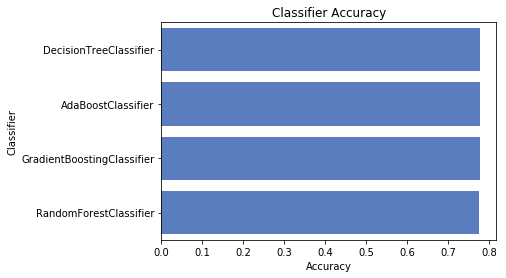

In [29]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train = train_status.drop(['Engine.ID', 'status', 'rul'], axis=1)
y_train = train_status['status']
X_test = test_status.drop(['Engine.ID', 'status', 'rul'], axis=1)
y_test = test_status['status']

acc_dict = {}
for clf in classifiers:
    name = clf.__class__.__name__
    print(name)
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    acc_dict[name] = acc
            
for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.title('Classifier Accuracy')
plt.xlabel('Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by=['Accuracy'], ascending=False), color="b")
plt.show()

# Similarity model

If we have comlete histories from similar machines then we can use similarity model to estimate RUL.